## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 o 3 variables categóricas y luego realizar algunas visualizaciones. Elige el Reto a) o b) y sigue las instrucciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('white')

df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv')
df.head(2)

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [2]:
cross = pd.crosstab(df["type"], df["rooms"])
cross

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
h,54,1261,3912,1991,475,54,9,6
t,9,299,575,138,4,0,0,0
u,582,1829,429,17,0,1,0,1


In [3]:
cross.loc["h"]

rooms
1      54
2    1261
3    3912
4    1991
5     475
6      54
7       9
8       6
Name: h, dtype: int64

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms'), Text(0, 0.5, 'Count')]

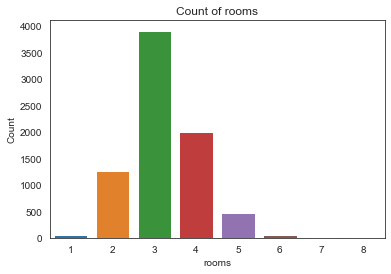

In [4]:
x = sns.barplot(cross.loc["h"].index, cross.loc["h"])
x.set(title = "Count of rooms", ylabel = "Count")

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms', ylabel='t'>

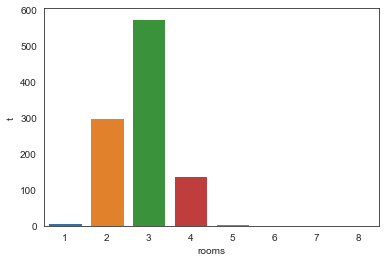

In [5]:
sns.barplot(cross.loc["t"].index, cross.loc["t"])

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms', ylabel='u'>

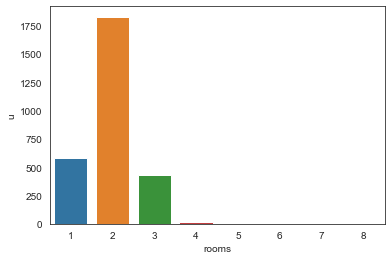

In [6]:
sns.barplot(cross.loc["u"].index, cross.loc["u"])

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [7]:
cross2 = pd.crosstab(df["region_name"], [df["type"],df["rooms"]])
cross2

type                         h                                 t            \
rooms                        1    2     3    4    5   6  7  8  1    2    3   
region_name                                                                  
Eastern Metropolitan         4   83   396  292   77   8  1  2  0   23   60   
Eastern Victoria             0    2    13   17    1   0  0  0  0    0    0   
Northern Metropolitan       23  539  1237  449   76   6  2  0  6  134  139   
Northern Victoria            0    2    12    5    1   1  0  0  0    0    0   
South-Eastern Metropolitan   0    8   123   74   14   5  0  0  0    3   13   
Southern Metropolitan       14  366  1028  704  217  23  5  3  3   72  233   
Western Metropolitan        13  260  1090  443   89  11  1  1  0   67  130   
Western Victoria             0    1    13    7    0   0  0  0  0    0    0   

type                                 u                     
rooms                        4  5    1    2    3  4  6  8  
region_name                                                
Eastern Metropolitan        18  1    9   97   48  5  0  0  
Eastern Victoria             0  0    0    2    1  0  0  0  
Northern Metropolitan       10  1  196  499   98  2  0  1  
Northern Victoria            1  0    0    0    0  0  0  0  
South-Eastern Metropolitan   4  0    2   19    7  0  0  0  
Southern Metropolitan       78  0  311  968  192  7  0  0  
Western Metropolitan        27  2   64  243   83  3  1  0  
Western Victoria             0  0    0    1    0  0  0  0

In [11]:
cross2.stack(level=0)

rooms                              1    2     3    4      5     6    7    8
region_name                type                                            
Eastern Metropolitan       h       4   83   396  292   77.0   8.0  1.0  2.0
                           t       0   23    60   18    1.0   NaN  NaN  NaN
                           u       9   97    48    5    NaN   0.0  NaN  0.0
Eastern Victoria           h       0    2    13   17    1.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    2     1    0    NaN   0.0  NaN  0.0
Northern Metropolitan      h      23  539  1237  449   76.0   6.0  2.0  0.0
                           t       6  134   139   10    1.0   NaN  NaN  NaN
                           u     196  499    98    2    NaN   0.0  NaN  1.0
Northern Victoria          h       0    2    12    5    1.0   1.0  0.0  0.0
                           t       0    0     0    1    0.0   NaN  NaN  NaN
                           u       0    0     0    0    NaN   0.0  NaN  0.0
South-Eastern Metropolitan h       0    8   123   74   14.0   5.0  0.0  0.0
                           t       0    3    13    4    0.0   NaN  NaN  NaN
                           u       2   19     7    0    NaN   0.0  NaN  0.0
Southern Metropolitan      h      14  366  1028  704  217.0  23.0  5.0  3.0
                           t       3   72   233   78    0.0   NaN  NaN  NaN
                           u     311  968   192    7    NaN   0.0  NaN  0.0
Western Metropolitan       h      13  260  1090  443   89.0  11.0  1.0  1.0
                           t       0   67   130   27    2.0   NaN  NaN  NaN
                           u      64  243    83    3    NaN   1.0  NaN  0.0
Western Victoria           h       0    1    13    7    0.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    1     0    0    NaN   0.0  NaN  0.0

In [18]:
cross3 = cross2.loc[['Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan']]["h"]
cross3

rooms,1,2,3,4,5,6,7,8
region_name,,,,,,,,
Eastern Metropolitan,4,83,396,292,77,8,1,2
Northern Metropolitan,23,539,1237,449,76,6,2,0
Southern Metropolitan,14,366,1028,704,217,23,5,3
Western Metropolitan,13,260,1090,443,89,11,1,1


In [44]:
cross3.loc[:][1]

region_name
Eastern Metropolitan      4
Northern Metropolitan    23
Southern Metropolitan    14
Western Metropolitan     13
Name: 1, dtype: int64

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms in houses in Eastern Metropolitan'),
 Text(0, 0.5, 'Count')]

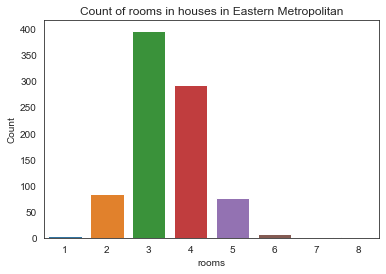

In [34]:
x = sns.barplot(cross3.loc["Eastern Metropolitan"].index, cross3.loc["Eastern Metropolitan"])
x.set(title = "Count of rooms in houses in Eastern Metropolitan", ylabel = "Count")

Otra forma de hacerlo

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms in houses in Eastern Metropolitan'),
 Text(0, 0.5, 'Count')]

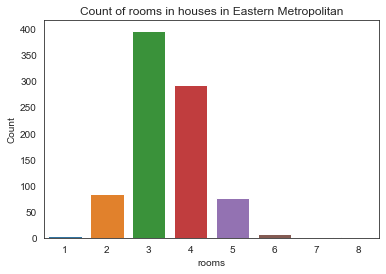

In [32]:
x = sns.barplot(cross2.loc["Eastern Metropolitan","h"].index, cross2.loc["Eastern Metropolitan","h"])
x.set(title = "Count of rooms in houses in Eastern Metropolitan", ylabel = "Count")

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms in houses in Northern Metropolitan'),
 Text(0, 0.5, 'Count')]

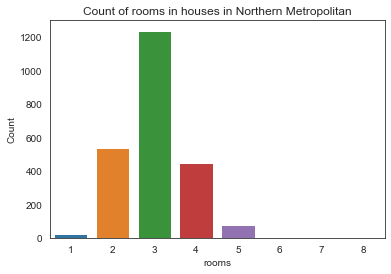

In [22]:
x = sns.barplot(cross3.loc["Northern Metropolitan"].index, cross3.loc["Northern Metropolitan"])
x.set(title = "Count of rooms in houses in Northern Metropolitan", ylabel = "Count")

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms in houses in Southern Metropolitan'),
 Text(0, 0.5, 'Count')]

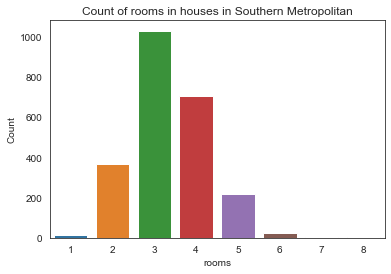

In [25]:
x = sns.barplot(cross3.loc["Southern Metropolitan"].index, cross3.loc["Southern Metropolitan"])
x.set(title = "Count of rooms in houses in Southern Metropolitan", ylabel = "Count")

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Count of rooms in houses in Western Metropolitan'),
 Text(0, 0.5, 'Count')]

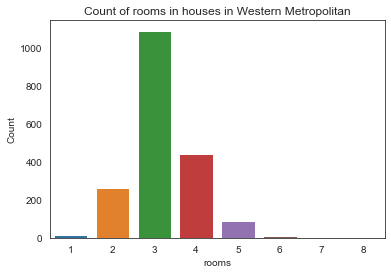

In [26]:
x = sns.barplot(cross3.loc["Western Metropolitan"].index, cross3.loc["Western Metropolitan"])
x.set(title = "Count of rooms in houses in Western Metropolitan", ylabel = "Count")

<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
    
type_rooms = pd.crosstab(df['type'], df['rooms'])
sns.barplot(type_rooms.loc['h'].index, type_rooms.loc['h'])
sns.barplot(type_rooms.loc['t'].index, type_rooms.loc['t'])
sns.barplot(type_rooms.loc['u'].index, type_rooms.loc['u'])
    
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
sns.barplot(regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')])
```
    
</details>